## Set Working Directory

In [1]:
import os

def find_project_root(start_dir="."):
    current_dir = os.path.abspath(start_dir)
    while True:
        if os.path.exists(os.path.join(current_dir, ".project_root")):
            return current_dir
        
        parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
        
        if parent_dir == current_dir:
            raise FileNotFoundError("Project root not found.")
        
        current_dir = parent_dir

project_root = find_project_root()
os.chdir(project_root)
print("Current working directory:", os.getcwd())


Current working directory: c:\Users\Wiede\OneDrive - Queen Mary, University of London\Documentation\Projects\HCockpit


In [2]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import csv

WORKSPACE = "./hcopilot_workspace"
DATA_PATH = WORKSPACE + "/data"
OUTPUT_PATH = WORKSPACE + "/output"

def save_coords(event):
    with open(f'{DATA_PATH}/raw/coords.csv', 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow([event.x, event.y])
    print(f"Recorded coordinates: ({event.x}, {event.y})")

def open_image():
    filepath = filedialog.askopenfilename()
    if not filepath:
        return
    img = Image.open(filepath)
    img_tk = ImageTk.PhotoImage(img)
    label.config(image=img_tk)
    label.image = img_tk
    label.bind("<Button-1>", save_coords)

root = tk.Tk()
label = tk.Label(root)
label.pack()

btn = tk.Button(root, text="Open Image", command=open_image)
btn.pack()

root.mainloop()


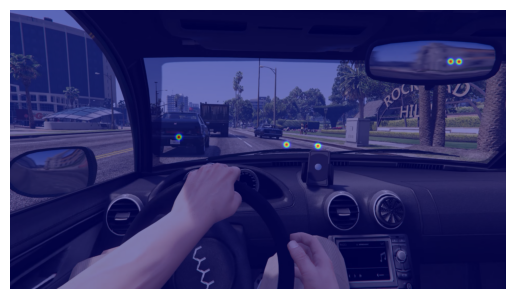

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from PIL import Image

# 读取原始图片和坐标数据
image_path = './data/change_lane-1.png'
coords_path = 'coords.csv'
image = Image.open(image_path)
data = np.zeros((image.height, image.width))

# 读取坐标并更新数据矩阵
with open(coords_path, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        x, y = int(row[0]), int(row[1])
        if 0 <= x < image.width and 0 <= y < image.height:
            data[y, x] += 1

# 应用高斯滤波生成热力图
data_smoothed = gaussian_filter(data, sigma=10)
plt.imshow(image)
plt.imshow(data_smoothed, alpha=0.5, cmap='jet')  # alpha调节透明度
plt.axis('off')
plt.show()
